In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "Lido"
SPLITS_FREQ = "W-WED"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2022-07-06"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-02-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073552
2021-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072336
2021-02-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071203
2021-02-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071522
2021-03-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,0.757895,0.624561,0.432632,0.216316,0.144211,0.021632,0.757895,0.799728,0.874486,0.874486,...,1.0,1.0,1.0,0.504051,0.926239,0.954955,0.954955,0.954955,0.954955,0.154062
2023-06-07,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122659
2023-06-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069231


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-02-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.075010
2021-02-10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.075429
2021-02-17,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.074636
2021-02-24,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073876
2021-03-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,1.0,0.691228,0.432632,0.216316,0.144211,0.021632,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.613596,0.977632,1.0,1.0,1.0,1.0,0.160839
2023-06-07,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,0.130522
2023-06-14,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073626


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2021-02-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073552,openpop
2021-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072336,openpop
2021-02-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071203,openpop
2021-02-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071522,openpop
2021-03-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070324,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,0.757895,0.624561,0.432632,0.216316,0.144211,0.021632,0.757895,0.799728,0.874486,0.874486,...,1.0,1.0,0.504051,0.926239,0.954955,0.954955,0.954955,0.954955,0.154062,openpop
2023-06-07,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122659,openpop
2023-06-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069231,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-05-11,1.0,14d,2022-05-11,0.001074,0.072240,5.0,1.0,3.200000,0.425000,0.375000,...,0.524510,0.891892,0.905405,0.905405,0.905405,0.905405,0.135452,itemknn,test,NaN
2022-05-18,1.0,7d,2022-05-18,0.004226,0.086647,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.133320,itemknn,test,NaN
2022-05-25,4.0,90d,2022-05-25,0.002111,0.184677,3.0,1.0,2.263682,0.592040,0.424544,...,0.845938,0.922794,0.922794,0.922794,0.922794,0.922794,0.157208,itemknn,test,NaN
2022-06-01,8.0,7d,2022-06-01,0.001229,0.095139,2.0,1.0,1.130841,0.971963,0.348910,...,0.975962,1.000000,1.000000,1.000000,1.000000,1.000000,0.142014,itemknn,test,NaN
2022-06-08,7.0,7d,2022-06-08,0.003429,0.166548,3.0,1.0,2.025381,0.796954,0.470389,...,0.742038,0.993631,0.993631,0.993631,0.993631,0.993631,0.155688,itemknn,test,NaN
2022-06-15,9.0,7d,2022-06-15,0.001120,0.125012,2.0,1.0,1.876712,0.465753,0.342466,...,0.970588,1.000000,1.000000,1.000000,1.000000,1.000000,0.147008,itemknn,test,NaN
2022-06-22,7.0,10YE,2022-06-22,0.005314,0.226541,3.0,1.0,2.338843,0.723140,0.358127,...,0.970476,0.978022,0.978022,0.978022,0.978022,0.978022,0.155633,itemknn,test,NaN
2022-06-29,8.0,90d,2022-06-29,0.003045,0.199807,3.0,1.0,2.527778,0.847222,0.356481,...,0.963570,0.986413,0.986413,0.986413,0.986413,0.986413,0.154066,itemknn,test,NaN
2022-07-06,15.0,90d,2022-07-06,0.003273,0.334395,3.0,1.0,2.348901,0.774725,0.540293,...,0.748818,0.915430,0.915430,0.915430,0.915430,0.915430,0.182368,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-05-11,1.0,14d,2022-05-11,0.001074,0.072240,5.0,1.0,3.200000,0.425000,0.375000,...,0.524510,0.891892,0.905405,0.905405,0.905405,0.905405,0.135452,itemknn,test,NaN
2022-05-18,1.0,7d,2022-05-18,0.004226,0.086647,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.133320,itemknn,test,NaN
2022-05-25,4.0,90d,2022-05-25,0.002111,0.184677,3.0,1.0,2.263682,0.592040,0.424544,...,0.845938,0.922794,0.922794,0.922794,0.922794,0.922794,0.157208,itemknn,test,NaN
2022-06-01,8.0,7d,2022-06-01,0.001229,0.095139,2.0,1.0,1.130841,0.971963,0.348910,...,0.975962,1.000000,1.000000,1.000000,1.000000,1.000000,0.142014,itemknn,test,NaN
2022-06-08,7.0,7d,2022-06-08,0.003429,0.166548,3.0,1.0,2.025381,0.796954,0.470389,...,0.742038,0.993631,0.993631,0.993631,0.993631,0.993631,0.155688,itemknn,test,NaN
2022-06-15,9.0,7d,2022-06-15,0.001120,0.125012,2.0,1.0,1.876712,0.465753,0.342466,...,0.970588,1.000000,1.000000,1.000000,1.000000,1.000000,0.147008,itemknn,test,NaN
2022-06-22,7.0,10YE,2022-06-22,0.005314,0.226541,3.0,1.0,2.338843,0.723140,0.358127,...,0.970476,0.978022,0.978022,0.978022,0.978022,0.978022,0.155633,itemknn,test,NaN
2022-06-29,8.0,90d,2022-06-29,0.003045,0.199807,3.0,1.0,2.527778,0.847222,0.356481,...,0.963570,0.986413,0.986413,0.986413,0.986413,0.986413,0.154066,itemknn,test,NaN
2022-07-06,15.0,90d,2022-07-06,0.003273,0.334395,3.0,1.0,2.348901,0.774725,0.540293,...,0.748818,0.915430,0.915430,0.915430,0.915430,0.915430,0.182368,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

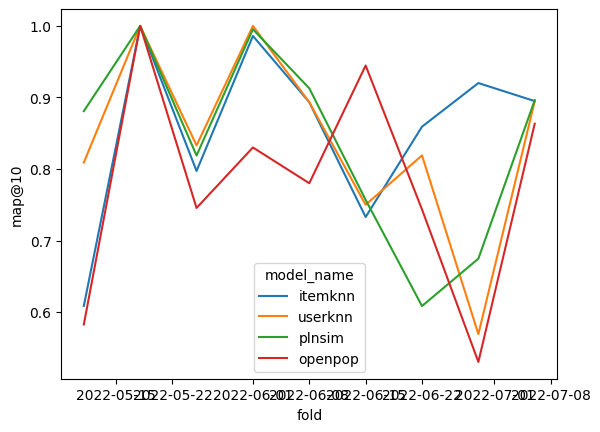

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2022-05-04,1,14d,2022-05-04,0.000936,0.002844,1,1.0,1.000000,1.000000,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123234
2022-05-11,1,7d,2022-05-11,0.005870,0.068629,5,1.0,3.105263,0.434211,0.390351,0.321053,0.160526,...,1.0,1.0,1.0,0.525253,0.902778,0.916667,0.916667,0.916667,0.916667,0.134353
2022-05-18,4,90d,2022-05-18,0.001673,0.121828,1,1.0,1.000000,1.000000,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.133716
2022-05-25,8,7d,2022-05-25,0.001145,0.116233,3,1.0,1.887218,0.721805,0.451128,0.270677,0.135338,...,1.0,1.0,1.0,0.826389,0.931193,0.931193,0.931193,0.931193,0.931193,0.150749
2022-06-01,7,7d,2022-06-01,0.001193,0.095328,2,1.0,1.130841,0.971963,0.348910,0.209346,0.104673,...,1.0,1.0,1.0,0.975962,1.000000,1.000000,1.000000,1.000000,1.000000,0.142462
2022-06-08,9,7d,2022-06-08,0.001171,0.166799,3,1.0,2.025381,0.796954,0.470389,0.282234,0.141117,...,1.0,1.0,1.0,0.742038,0.993631,0.993631,0.993631,0.993631,0.993631,0.155018
2022-06-15,7,10YE,2022-06-15,0.005000,0.255230,2,1.0,1.715867,0.889299,0.344403,0.206642,0.103321,...,1.0,1.0,1.0,0.981328,1.000000,1.000000,1.000000,1.000000,1.000000,0.156142
2022-06-22,8,90d,2022-06-22,0.005554,0.217440,3,1.0,2.330544,0.732218,0.358438,0.215063,0.107531,...,1.0,1.0,1.0,0.970476,0.978022,0.978022,0.978022,0.978022,0.978022,0.154562
2022-06-29,15,90d,2022-06-29,0.003081,0.198804,3,1.0,2.527778,0.847222,0.356481,0.213889,0.106944,...,1.0,1.0,1.0,0.963570,0.986413,0.986413,0.986413,0.986413,0.986413,0.153263
